# Predicting Customer Churn in the Telco Industry
___
The [data](https://www.kaggle.com/blastchar/telco-customer-churn/home) contains customer information from a telcom company, including demographic information and services they were using. The data also contains information about customers who left in the last month. This data can be used to predict the behavior of other customers in order to improve retention. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Exploratory Data Analysis

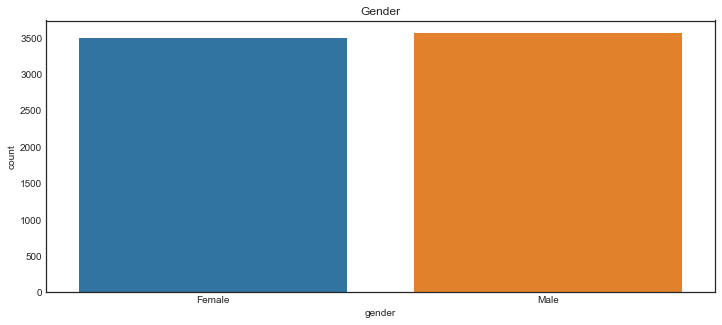

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x="gender", data=df);
plt.title('Gender')


plt.show()

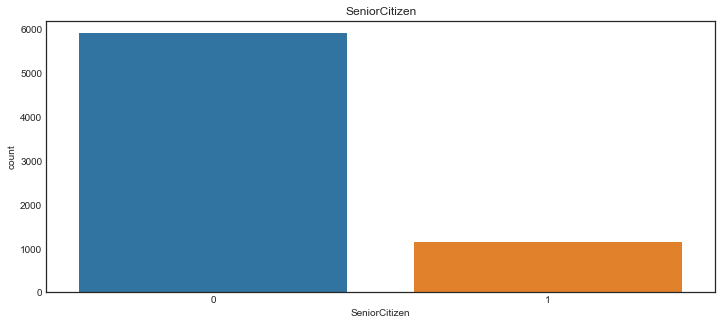

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x="SeniorCitizen", data=df);
plt.title('SeniorCitizen')


plt.show()

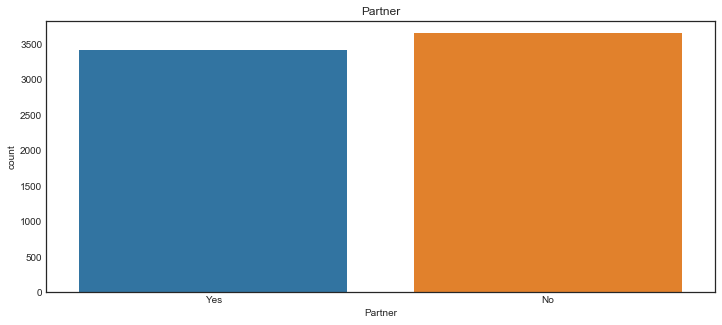

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x="Partner", data=df);
plt.title('Partner')


plt.show()

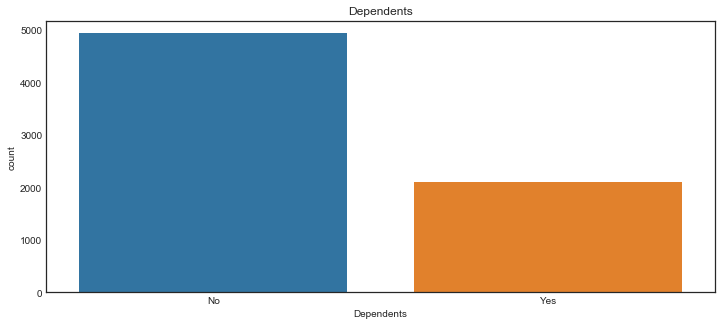

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x="Dependents", data=df);
plt.title('Dependents')


plt.show()

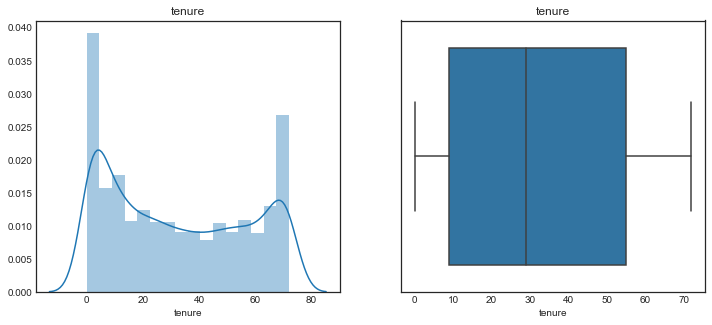

In [10]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(1, 2, 2)
sns.boxplot(df['tenure'])
plt.title('tenure')

plt.show()

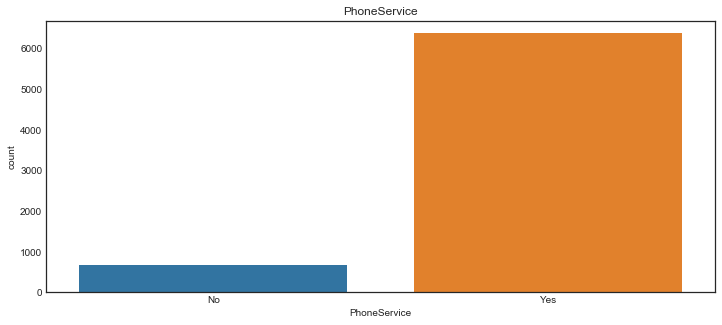

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x="PhoneService", data=df);
plt.title('PhoneService')


plt.show()

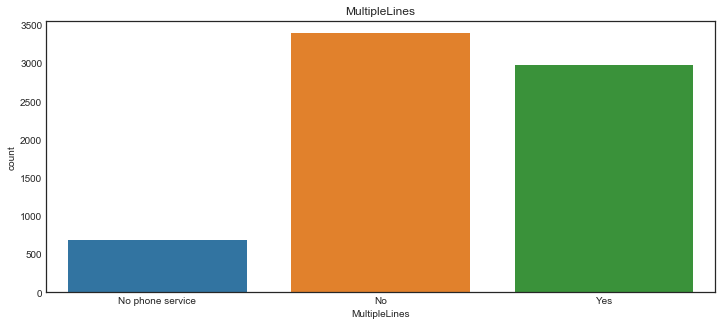

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x="MultipleLines", data=df);
plt.title('MultipleLines')


plt.show()

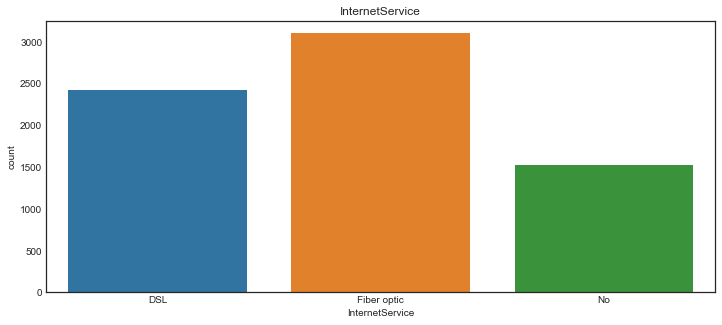

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x="InternetService", data=df);
plt.title('InternetService')


plt.show()

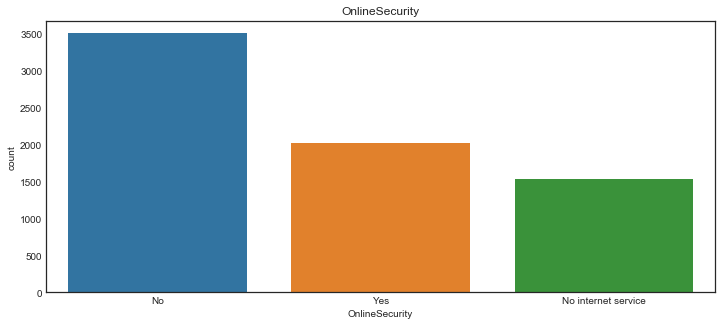

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x="OnlineSecurity", data=df);
plt.title('OnlineSecurity')


plt.show()

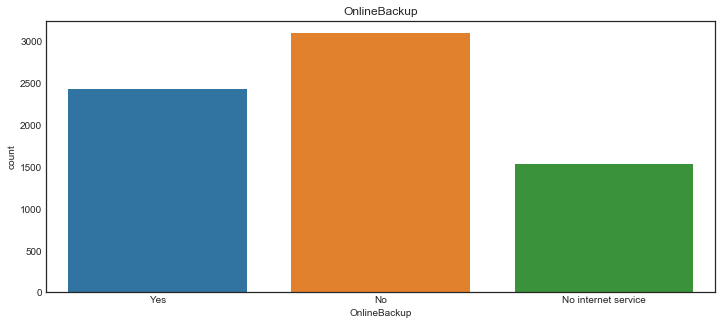

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x="OnlineBackup", data=df);
plt.title('OnlineBackup')


plt.show()

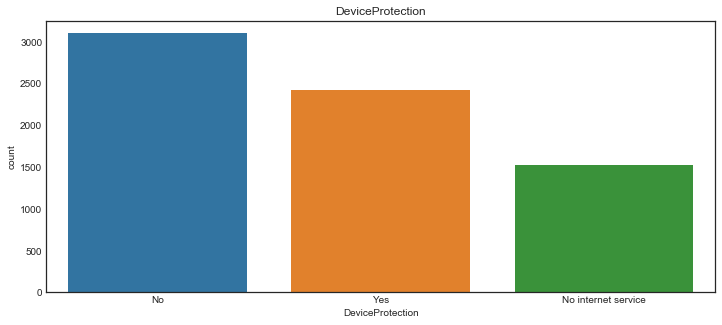

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x="DeviceProtection", data=df);
plt.title('DeviceProtection')


plt.show()

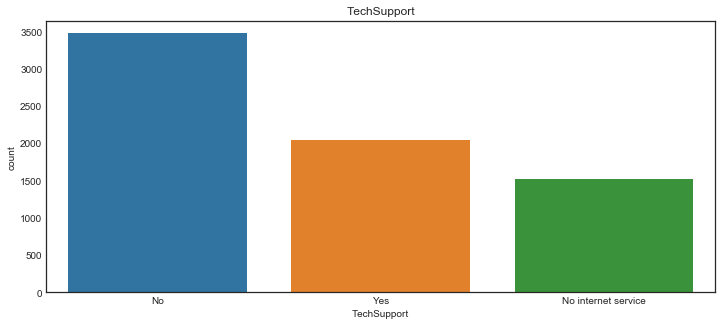

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x="TechSupport", data=df);
plt.title('TechSupport')


plt.show()

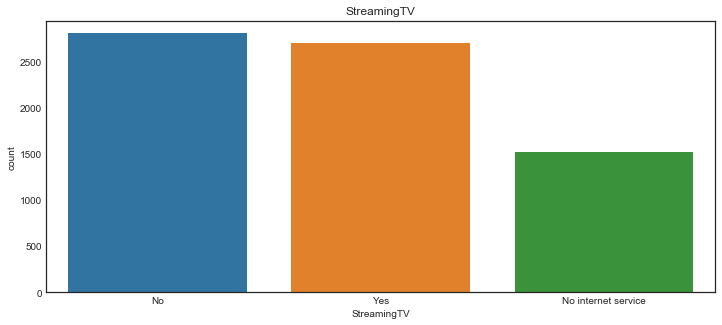

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x="StreamingTV", data=df);
plt.title('StreamingTV')


plt.show()

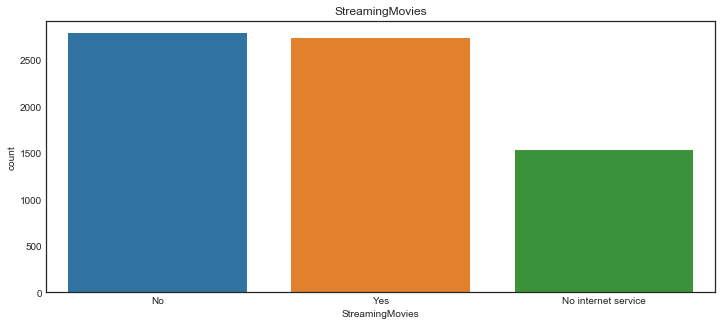

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x="StreamingMovies", data=df);
plt.title('StreamingMovies')


plt.show()

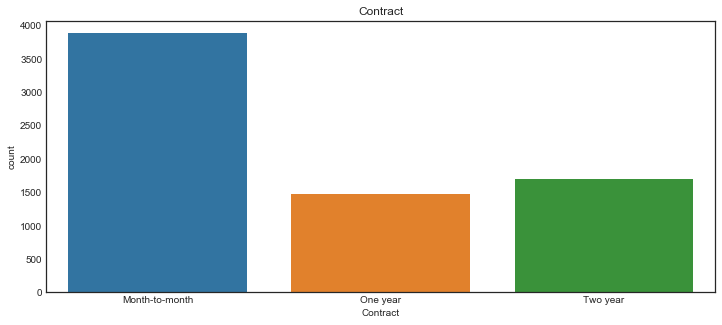

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x="Contract", data=df);
plt.title('Contract')


plt.show()

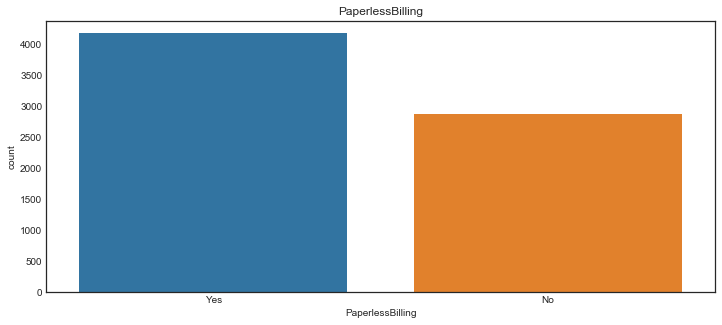

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaperlessBilling", data=df);
plt.title('PaperlessBilling')


plt.show()

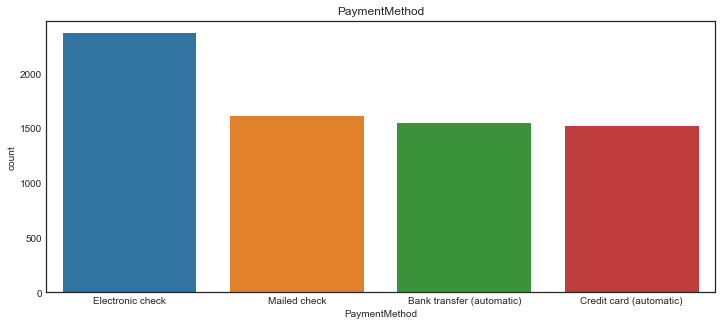

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaymentMethod", data=df);
plt.title('PaymentMethod')


plt.show()

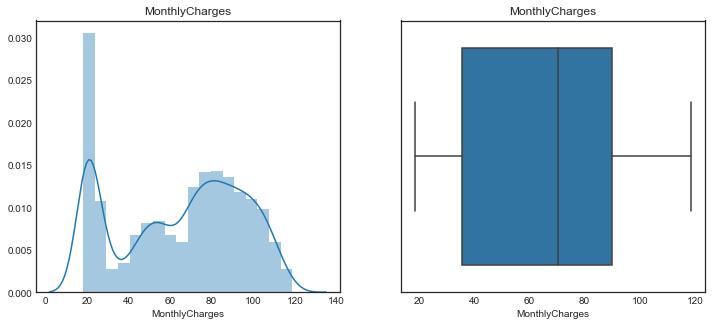

In [23]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.show()

In [24]:
for i in range(len(df)):
    q = float(df['TotalCharges'][i])
    print(i, df['TotalCharges'][i])

0 29.85
1 1889.5
2 108.15
3 1840.75
4 151.65
5 820.5
6 1949.4
7 301.9
8 3046.05
9 3487.95
10 587.45
11 326.8
12 5681.1
13 5036.3
14 2686.05
15 7895.15
16 1022.95
17 7382.25
18 528.35
19 1862.9
20 39.65
21 202.25
22 20.15
23 3505.1
24 2970.3
25 1530.6
26 4749.15
27 30.2
28 6369.45
29 1093.1
30 6766.95
31 181.65
32 1874.45
33 20.2
34 45.25
35 7251.7
36 316.9
37 3548.3
38 3549.25
39 1105.4
40 475.7
41 4872.35
42 418.25
43 4861.45
44 981.45
45 3906.7
46 97
47 144.15
48 4217.8
49 4254.1
50 3838.75
51 1426.4
52 1752.65
53 633.3
54 4456.35
55 1752.55
56 6311.2
57 7076.35
58 894.3
59 7853.7
60 4707.1
61 5450.7
62 2962
63 957.1
64 857.25
65 244.1
66 3650.35
67 2497.2
68 930.9
69 887.35
70 49.05
71 1090.65
72 7099
73 1424.6
74 177.4
75 6139.5
76 2688.85
77 482.25
78 2111.3
79 1216.6
80 79.35
81 565.35
82 496.9
83 4327.5
84 973.35
85 918.75
86 2215.45
87 1057
88 927.1
89 1009.25
90 2570.2
91 74.7
92 5714.25
93 7107
94 7459.05
95 927.35
96 4748.7
97 113.85
98 1107.2
99 2514.5
100 20.2
101 19.45
10

ValueError: could not convert string to float: 

In [58]:
df['TotalCharges'][488]

' '

In [59]:
len(df[df['TotalCharges'] == ' '])

11

In [3]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float64')

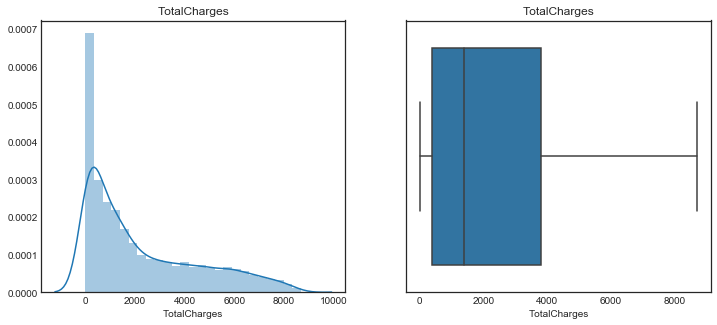

In [61]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.show()

# Examine the target variable

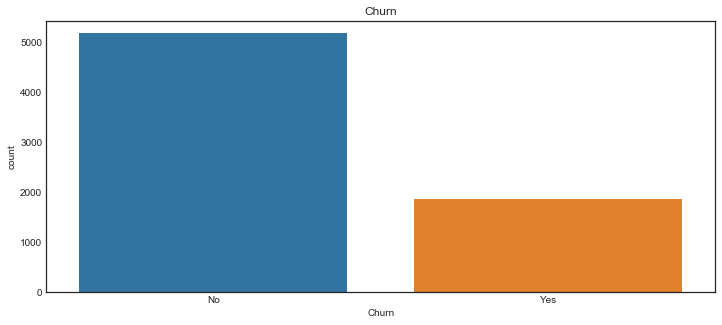

In [62]:
plt.figure(figsize=(12,5))
sns.countplot(x="Churn", data=df);
plt.title('Churn')


plt.show()

In [5]:
len(df[df['Churn'] == 'No']) / len(df)

0.7342150170648464

### Benchmark of 0.734

# Feature Engineering and Selection

In [4]:
#Create dummies
df = pd.get_dummies(data=df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
X = df.drop(['customerID', 'Churn'], axis=1)
df['Churn'] = np.where(df['Churn'] == 'No', 0, 1)
y = df['Churn'].values.reshape(-1, 1)

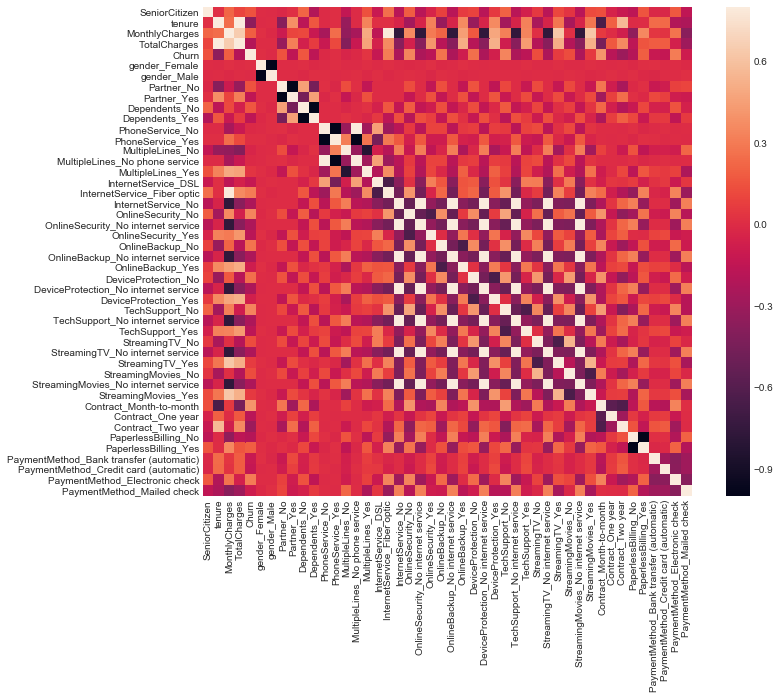

In [65]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Initialize and fit model 

# Naive Bayes

In [66]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y_pred != df['Churn']).sum().sum()
))

Number of mislabeled points out of a total 7032 points : 1979


In [67]:
cross_val_score(bnb, X, y, cv=10)

array([0.72159091, 0.74573864, 0.71164773, 0.74537696, 0.72972973,
       0.6742532 , 0.7083926 , 0.71266003, 0.70412518, 0.71509972])

# KNN

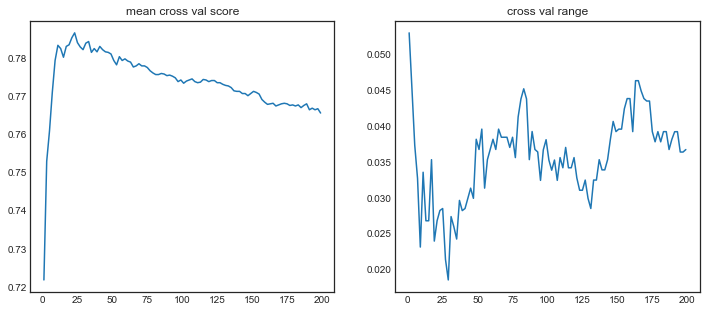

In [68]:
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')

plt.show()

In [69]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
11,23,0.786549,0.028168


In [70]:
no_neighbors[no_neighbors['score_range'] == no_neighbors['score_range'].min()]

,k,mean_score,score_range
14,29,0.78214,0.018466


In [71]:
neighbors = KNeighborsClassifier(n_neighbors=23)
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [72]:
cross_val_score(neighbors, X, y, cv=10)

array([0.78267045, 0.79829545, 0.78409091, 0.77809388, 0.78520626,
       0.77382646, 0.79516358, 0.77667141, 0.78947368, 0.8019943 ])

In [73]:
neighbors = KNeighborsClassifier(n_neighbors=29)
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [74]:
cross_val_score(neighbors, X, y, cv=10)

array([0.77840909, 0.79403409, 0.77556818, 0.78378378, 0.77667141,
       0.77951636, 0.78378378, 0.77667141, 0.78236131, 0.79059829])

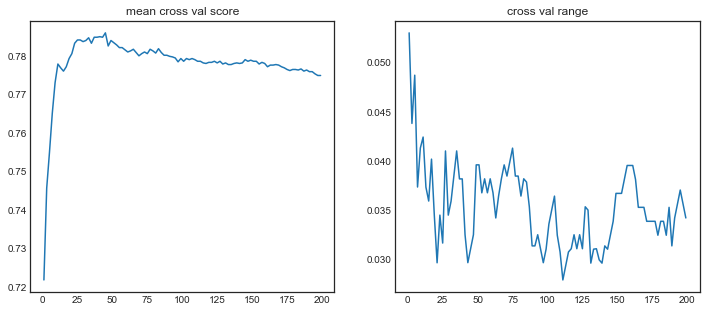

In [56]:
#with distance weighting
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i, weights='distance')
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')

plt.show()

In [57]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
22,45,0.78598,0.031009


In [59]:
#confusion matrix
neighbors = KNeighborsClassifier(n_neighbors=23)
y_pred = neighbors.fit(X,y).predict(X)

confusion_matrix(y, y_pred)

array([[4816,  347],
       [1072,  797]], dtype=int64)

In [67]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 347
Type 2 error (false negative): 1072
Sensitivity: 0.42643124665596577
Specificity: 0.9327910129769514


# Decision Tree

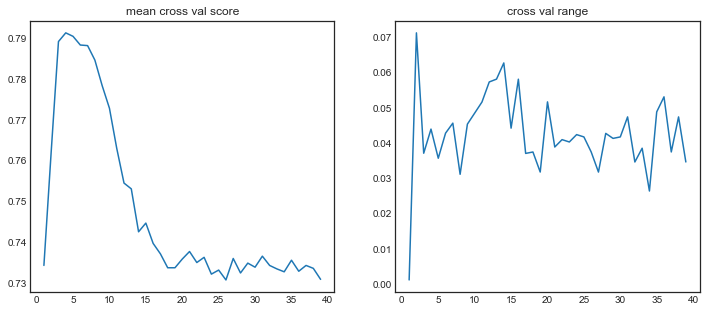

In [77]:
param_tune = []
for i in range(1, 40):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [78]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
3,4,0.791241,0.043827


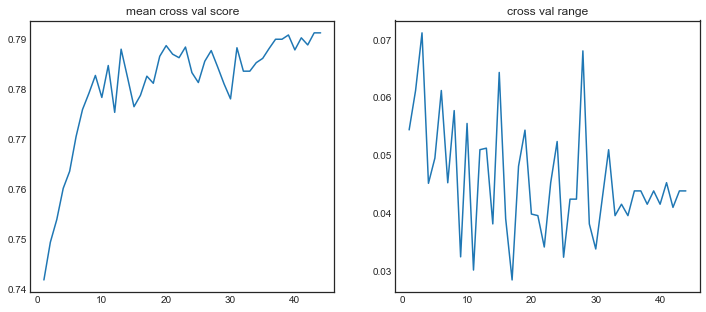

In [79]:
param_tune = []
for i in range(1, 45):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [80]:
#The default 'None' max features is performing best
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
42,43,0.791241,0.043827
43,44,0.791241,0.043827


In [81]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',  max_depth=4)
y_pred = decision_tree.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[4673,  490],
       [ 950,  919]], dtype=int64)

In [83]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 490
Type 2 error (false negative): 950
Sensitivity: 0.4917067950775816
Specificity: 0.905093937633159


In [82]:
cross_val_score(decision_tree, X, y, cv=10)

array([0.79545455, 0.80823864, 0.78267045, 0.79516358, 0.77809388,
       0.76671408, 0.80369844, 0.78378378, 0.78805121, 0.81054131])

# Random Forest

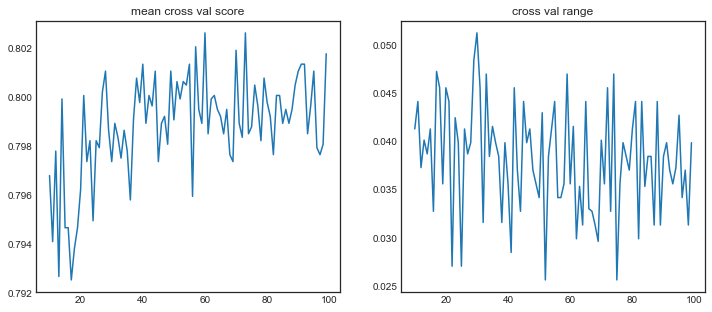

In [99]:
#Tune number of estimators
param_tune = []
for i in np.arange(10, 100):
    rfc = ensemble.RandomForestClassifier(n_estimators=i, max_depth=8, max_features=None)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [101]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
50,60,0.802616,0.035562


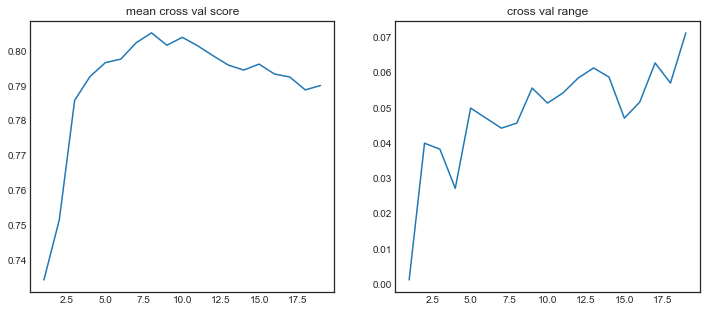

In [102]:
#Tune max depth with 60 estimators
param_tune = []
for i in np.arange(1, 20):
    rfc = ensemble.RandomForestClassifier(n_estimators=60, max_depth=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [103]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
7,8,0.805033,0.045519


In [104]:
# tume max features
param_tune = []
for i in [None, 'sqrt', 'log2']:
    rfc = ensemble.RandomForestClassifier(n_estimators=60, max_depth=8, max_features=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

param_tune

,parameter,mean_score,score_range
0,None,0.799343,0.035562
1,sqrt,0.801907,0.051209
2,log2,0.802475,0.048364


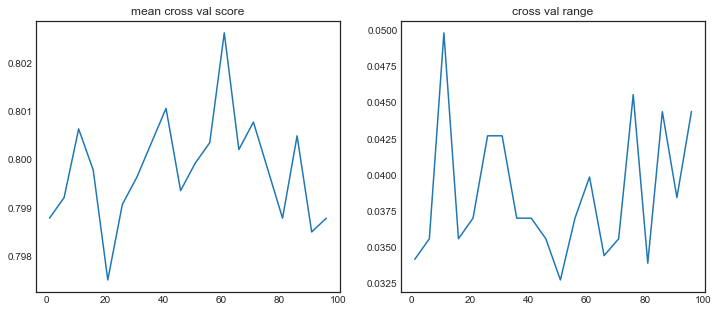

In [105]:
# tune min sample leaf
param_tune = []
for i in np.arange(1, 100, 5):
    rfc = ensemble.RandomForestClassifier(n_estimators=60, max_depth=8, max_features=None, min_samples_leaf=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [106]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
12,61,0.802616,0.039829


In [107]:
rfc = ensemble.RandomForestClassifier(n_estimators=60, max_depth=8, max_features=None, min_samples_leaf=61)
cross_val_score(rfc, X, y, cv=10)

array([0.80823864, 0.81392045, 0.80397727, 0.80512091, 0.78378378,
       0.78520626, 0.81507824, 0.79374111, 0.78520626, 0.81481481])

In [108]:
y_pred = rfc.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[4731,  432],
       [ 889,  980]], dtype=int64)

In [109]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 432
Type 2 error (false negative): 889
Sensitivity: 0.5243445692883895
Specificity: 0.916327716443928


# Logistic Regression

In [133]:
lr = LogisticRegression(C=1e9)
                      
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y = lr.predict(X)

print('\n Percentage accuracy')
print(lr.score(X, y))

confusion_matrix(y, y_pred)

Coefficients
[[ 2.45937997e-01 -6.06340713e-02  2.28630103e-03  3.15995220e-04
  -5.34465463e-02 -8.09900208e-02 -8.70881034e-02 -4.73484637e-02
   1.82336997e-02 -1.52670267e-01  1.12989475e-01 -2.47426042e-01
  -2.43591885e-01  1.12989475e-01 -3.83415748e-03 -3.57944642e-01
   3.26838071e-01 -1.03329996e-01  2.24434685e-01 -1.03329996e-01
  -2.55541256e-01  8.59659855e-02 -1.03329996e-01 -1.17072557e-01
   2.25460218e-02 -1.03329996e-01 -5.36525929e-02  2.27234931e-01
  -1.03329996e-01 -2.58341502e-01 -1.03985298e-01 -1.03329996e-01
   7.28787274e-02 -1.08456339e-01 -1.03329996e-01  7.73497682e-02
   4.94943050e-01 -1.90035469e-01 -4.39344147e-01 -2.41640328e-01
   1.07203761e-01 -8.18215684e-02 -1.70050162e-01  2.68734426e-01
  -1.51299263e-01]]
[-0.13443657]

 Percentage accuracy
0.8056029579067122


array([[4629,  534],
       [ 833, 1036]], dtype=int64)

In [134]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 534
Type 2 error (false negative): 833
Sensitivity: 0.5543071161048689
Specificity: 0.8965717606042998


In [120]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,Contract_Month-to-month,0.494943,0.494943
1,Contract_Two year,-0.439344,0.439344
2,InternetService_DSL,-0.357945,0.357945
3,InternetService_Fiber optic,0.326838,0.326838
4,PaymentMethod_Electronic check,0.268734,0.268734
5,TechSupport_Yes,-0.258342,0.258342
6,OnlineSecurity_Yes,-0.255541,0.255541
7,PhoneService_Yes,-0.247426,0.247426
8,SeniorCitizen,0.245938,0.245938
9,MultipleLines_No,-0.243592,0.243592


In [124]:
cross_val_score(lr, X, y, cv=10)

array([0.79403409, 0.81392045, 0.80539773, 0.81792319, 0.78093883,
       0.79658606, 0.81223329, 0.81081081, 0.79800853, 0.80626781])

# Logistic Regression with Ridge Regularization

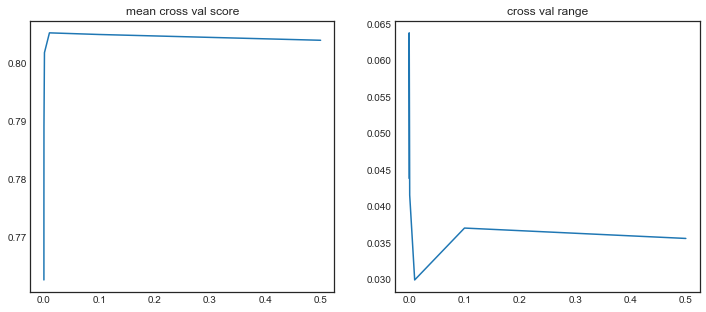

In [127]:
# tune l2 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.1, 0.5]:
    ridge = LogisticRegression(penalty='l2', C=i)
    ridge.fit(X, y)
    score = cross_val_score(ridge, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [128]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
5,0.01,0.805176,0.029872


In [18]:
ridge = LogisticRegression(penalty='l2', C=0.01)
                      
fit = ridge.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = ridge.predict(X)

print('\n Percentage accuracy')
print(ridge.score(X, y))

confusion_matrix(y, y_pred)

Coefficients
[[ 0.18059098 -0.0681136   0.00452356  0.00035434 -0.04690531 -0.06672353
  -0.06967654 -0.04395231  0.01523778 -0.12886662  0.07461966 -0.1882485
  -0.20976882  0.07461966  0.02152032 -0.25399225  0.23851994 -0.09815654
   0.18411821 -0.09815654 -0.19959051  0.07140798 -0.09815654 -0.08688028
   0.03194047 -0.09815654 -0.04741277  0.18988274 -0.09815654 -0.20535505
  -0.06813271 -0.09815654  0.05266041 -0.07141388 -0.09815654  0.05594157
   0.30985044 -0.14102176 -0.28245753 -0.21106214  0.0974333  -0.06518751
  -0.12096445  0.21505815 -0.14253504]]
[-0.11362884]

 Percentage accuracy
0.8064562002275313


array([[4663,  500],
       [ 861, 1008]], dtype=int64)

In [19]:
cross_val_score(ridge, X, y, cv=10)

array([0.80255682, 0.80965909, 0.80255682, 0.81650071, 0.78662873,
       0.79800853, 0.81365576, 0.81365576, 0.80512091, 0.8034188 ])

In [144]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 500
Type 2 error (false negative): 861
Sensitivity: 0.5393258426966292
Specificity: 0.9031570792175092


# Logistic Regression with Lasso Regularization

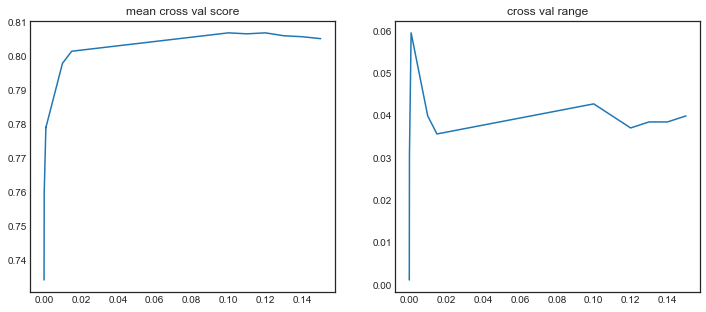

In [145]:
# tune l1 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]:
    lasso = LogisticRegression(penalty='l1', C=i)
    lasso.fit(X, y)
    score = cross_val_score(lasso, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [146]:
param_tune

,parameter,mean_score,score_range
0,0.000001,0.734215,0.001046
1,0.000010,0.734215,0.001046
2,0.000100,0.759960,0.030623
3,0.001000,0.779155,0.059466
4,0.001000,0.779013,0.059466
5,0.010000,0.797924,0.039829
6,0.015000,0.801479,0.035562
7,0.100000,0.806884,0.042674
8,0.110000,0.806599,0.039829
9,0.120000,0.806884,0.036984


In [20]:
lasso = LogisticRegression(penalty='l1', C=0.12)
                      
fit = lasso.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lasso.predict(X)

print('\n Percentage accuracy')
print(lasso.score(X, y))

confusion_matrix(y, y_pred)

Coefficients
[[ 1.88213632e-01 -6.45160395e-02 -4.42966502e-05  3.50229708e-04
   0.00000000e+00 -5.61135086e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.31216318e-01  0.00000000e+00 -3.59136308e-01
  -2.64155673e-01  0.00000000e+00  0.00000000e+00 -1.98010975e-01
   5.15744747e-01 -4.11703266e-05  3.01367414e-02 -6.21512576e-02
  -3.47305767e-01  4.19649405e-02  0.00000000e+00 -8.92074210e-02
   5.48326894e-03  0.00000000e+00 -2.74258304e-03  3.57965742e-01
  -4.87371738e-02 -5.91186470e-03 -1.16123350e-01 -4.98595168e-01
   2.55801787e-02  0.00000000e+00  0.00000000e+00  1.51883016e-01
   3.88963833e-01 -1.71326375e-01 -7.50497775e-01 -3.51699676e-01
   0.00000000e+00  0.00000000e+00 -3.70955066e-02  3.11115865e-01
  -4.94621091e-02]]
[-0.00149685]

 Percentage accuracy
0.8071672354948806


array([[4644,  519],
       [ 837, 1032]], dtype=int64)

In [148]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 519
Type 2 error (false negative): 837
Sensitivity: 0.5521669341894061
Specificity: 0.8994770482277745


In [21]:
cross_val_score(lasso, X, y, cv=10)

array([0.79829545, 0.81107955, 0.80397727, 0.81934566, 0.78378378,
       0.79943101, 0.82361309, 0.81365576, 0.80512091, 0.80626781])

In [149]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,InternetService_No,-0.736906,0.736906
1,InternetService_DSL,-0.639080,0.639080
2,Contract_Two year,-0.579279,0.579279
3,Contract_Month-to-month,0.560225,0.560225
4,OnlineSecurity_No,0.377742,0.377742
5,PhoneService_Yes,-0.361238,0.361238
6,PaperlessBilling_No,-0.351713,0.351713
7,PaymentMethod_Electronic check,0.311122,0.311122
8,MultipleLines_No,-0.263711,0.263711
9,TechSupport_Yes,-0.200573,0.200573


# SVM

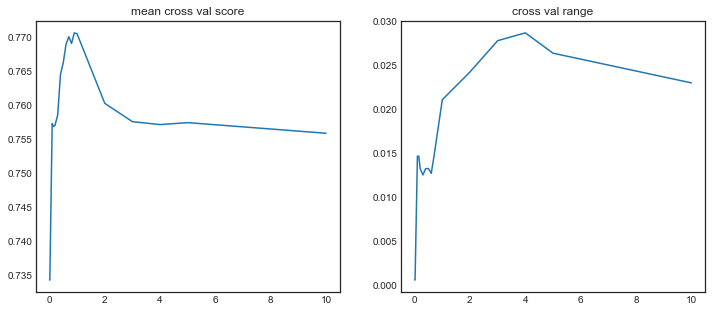

In [150]:
# tune C parameter
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.15, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 10]:
    svm = SVC(C=i)    
    svm.fit(X, y)
    score = cross_val_score(svm, X, y, cv=5)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [151]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
16,0.9,0.770624,0.018878


In [ ]:
# tune 
#param_tune = []
#for i in ['linear', 'poly', 'rbf']:
#    svm = SVC(C=.9, kernel=i)    
#    svm.fit(X, y)
#    score = cross_val_score(svm, X, y, cv=5)
#    mean_score = score.mean()
#    score_range = score.max() - score.min()
#    param_tune.append([i, mean_score, score_range])

#param_tune = pd.DataFrame(param_tune)
#param_tune.columns = ['parameter', 'mean_score', 'score_range']

#param_tune

In [ ]:
#svm = SVC(C=.9, kernel='poly')
#cross_val_score(svm, X, y, cv=3)

In [5]:
y_1d = df['Churn']
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.grid_scores_

In [6]:
svc_param_selection(X, y_1d, 5)

[mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 0.001},
 mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 0.01},
 mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 0.1},
 mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 1},
 mean: 0.75398, std: 0.00465, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.73422, std: 0.00017, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.73422, std: 0.00017, params: {'C': 0.01, 'gamma': 0.1},
 mean: 0.73422, std: 0.00017, params: {'C': 0.01, 'gamma': 1},
 mean: 0.76934, std: 0.00710, params: {'C': 0.1, 'gamma': 0.001},
 mean: 0.75739, std: 0.00505, params: {'C': 0.1, 'gamma': 0.01},
 mean: 0.75100, std: 0.00439, params: {'C': 0.1, 'gamma': 0.1},
 mean: 0.73436, std: 0.00032, params: {'C': 0.1, 'gamma': 1},
 mean: 0.78498, std: 0.00620, params: {'C': 1, 'gamma': 0.001},
 mean: 0.77090, std: 0.00459, params: {'C': 1, 'gamma': 0.01},
 mean: 0.76294, std: 0.00465, params: {'C': 1, 'gamma': 0.1},
 mean: 0.74133, std: 0.00343

In [15]:
svm = SVC(C=1, kernel='rbf', gamma=0.001)
cross_val_score(svm, X, y, cv=3)

array([0.78114334, 0.77474403, 0.7862628 ])

In [22]:
svm = SVC(C=.9, kernel='linear')
cross_val_score(svm, X, y, cv=3)

array([0.79180887, 0.78882253, 0.80290102])

In [24]:
y_pred = svm.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[4773,  390],
       [1037,  832]], dtype=int64)

In [25]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 390
Type 2 error (false negative): 1037
Sensitivity: 0.4451578384162654
Specificity: 0.9244625217896572


# Gradient Boost 

In [12]:
y_1d = df['Churn']
# Find number of estimators
param_test1 = {'n_estimators':np.arange(1, 150), 'max_depth': np.arange(2,16)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',subsample=0.8), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y_1d)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 1},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 2},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 3},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 4},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 5},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 6},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 7},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 8},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 9},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 10},
  mean: 0.74929, std: 0.00844, params: {'max_depth': 2, 'n_estimators': 11},
  mean: 0.74232, std: 0.01097, params: {'max_depth': 2, 'n_estimators': 12},
  mean: 0.75682, std: 0.01215, params: {'max_depth': 2, 'n_estimators': 13},
  mean: 

In [13]:
param_test2 = {'min_samples_split': np.arange(50,1001,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=110, max_depth=3, min_samples_leaf=50, max_features='sqrt', subsample=0.8), 
param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch2.fit(X,y_1d)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.80688, std: 0.00747, params: {'min_samples_split': 50},
  mean: 0.80660, std: 0.00861, params: {'min_samples_split': 60},
  mean: 0.80489, std: 0.00786, params: {'min_samples_split': 70},
  mean: 0.80518, std: 0.00862, params: {'min_samples_split': 80},
  mean: 0.80788, std: 0.00855, params: {'min_samples_split': 90},
  mean: 0.80660, std: 0.00871, params: {'min_samples_split': 100},
  mean: 0.80276, std: 0.00721, params: {'min_samples_split': 110},
  mean: 0.80489, std: 0.00902, params: {'min_samples_split': 120},
  mean: 0.80333, std: 0.00751, params: {'min_samples_split': 130},
  mean: 0.80304, std: 0.00762, params: {'min_samples_split': 140},
  mean: 0.80461, std: 0.00854, params: {'min_samples_split': 150},
  mean: 0.80589, std: 0.00609, params: {'min_samples_split': 160},
  mean: 0.80589, std: 0.00843, params: {'min_samples_split': 170},
  mean: 0.80503, std: 0.01169, params: {'min_samples_split': 180},
  mean: 0.80376, std: 0.00792, params: {'min_samples_split': 190},


In [17]:
param_test3 = {'min_samples_leaf': np.arange(20,71)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=210, n_estimators=110, max_depth=3, max_features='sqrt', subsample=0.8), 
param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch3.fit(X,y_1d)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.80532, std: 0.00857, params: {'min_samples_leaf': 20},
  mean: 0.80688, std: 0.00866, params: {'min_samples_leaf': 21},
  mean: 0.80290, std: 0.00762, params: {'min_samples_leaf': 22},
  mean: 0.80404, std: 0.00721, params: {'min_samples_leaf': 23},
  mean: 0.80560, std: 0.00827, params: {'min_samples_leaf': 24},
  mean: 0.80560, std: 0.01039, params: {'min_samples_leaf': 25},
  mean: 0.80390, std: 0.00857, params: {'min_samples_leaf': 26},
  mean: 0.80375, std: 0.00847, params: {'min_samples_leaf': 27},
  mean: 0.80376, std: 0.00825, params: {'min_samples_leaf': 28},
  mean: 0.80745, std: 0.00935, params: {'min_samples_leaf': 29},
  mean: 0.80475, std: 0.00654, params: {'min_samples_leaf': 30},
  mean: 0.80631, std: 0.00777, params: {'min_samples_leaf': 31},
  mean: 0.80432, std: 0.00963, params: {'min_samples_leaf': 32},
  mean: 0.80475, std: 0.00544, params: {'min_samples_leaf': 33},
  mean: 0.80617, std: 0.00969, params: {'min_samples_leaf': 34},
  mean: 0.80390, std: 0.0

In [26]:
param_test5 = {'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=110,max_depth=3,min_samples_split=210, min_samples_leaf=45,max_features='sqrt'),
param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y_1d)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.80347, std: 0.00746, params: {'subsample': 0.5},
  mean: 0.80390, std: 0.00853, params: {'subsample': 0.55},
  mean: 0.80333, std: 0.00938, params: {'subsample': 0.6},
  mean: 0.80575, std: 0.01050, params: {'subsample': 0.65},
  mean: 0.80262, std: 0.00925, params: {'subsample': 0.7},
  mean: 0.80247, std: 0.00751, params: {'subsample': 0.75},
  mean: 0.80418, std: 0.01098, params: {'subsample': 0.8},
  mean: 0.80461, std: 0.00902, params: {'subsample': 0.85},
  mean: 0.80631, std: 0.00783, params: {'subsample': 0.9},
  mean: 0.80617, std: 0.00912, params: {'subsample': 0.95},
  mean: 0.80546, std: 0.01135, params: {'subsample': 1}],
 {'subsample': 0.9},
 0.8063146583065064)

In [27]:
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=110, max_depth=3, min_samples_split=210, min_samples_leaf=45,max_features='sqrt',subsample=0.8)
cross_val_score(clf, X, y_1d, cv=10, scoring='accuracy')

array([0.80965909, 0.81392045, 0.80255682, 0.82503556, 0.78805121,
       0.78662873, 0.83072546, 0.78805121, 0.79374111, 0.81196581])

In [28]:
y_pred = clf.fit(X, y_1d).predict(X)

confusion_matrix(y, y_pred)

array([[4708,  455],
       [ 830, 1039]], dtype=int64)

In [29]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 455
Type 2 error (false negative): 830
Sensitivity: 0.555912252541466
Specificity: 0.9118729420879333


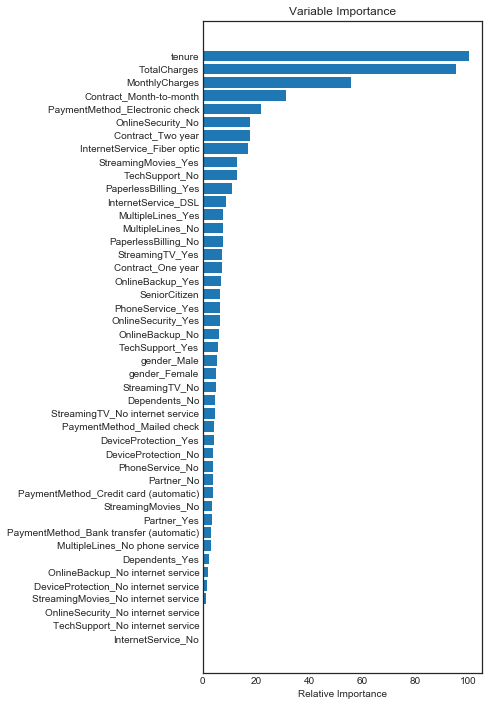

In [31]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(5,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# PCA

Covariance Matrix:
 [[ 1.36045894e-01  1.41988373e-01  2.43995111e+00 ... -3.69948687e-03
   2.98567663e-02 -2.36794666e-02]
 [ 1.41988373e-01  6.02469774e+02  1.82299526e+02 ...  2.35278955e+00
  -2.43770789e+00 -2.39148698e+00]
 [ 2.43995111e+00  1.82299526e+02  9.05165825e+02 ...  3.72311953e-01
   3.85396638e+00 -4.75424917e+00]
 ...
 [-3.69948687e-03  2.35278955e+00  3.72311953e-01 ...  1.69536676e-01
  -7.27552603e-02 -4.93443711e-02]
 [ 2.98567663e-02 -2.43770789e+00  3.85396638e+00 ... -7.27552603e-02
   2.23240500e-01 -7.67254685e-02]
 [-2.36794666e-02 -2.39148698e+00 -4.75424917e+00 ... -4.93443711e-02
  -7.67254685e-02  1.76095494e-01]]


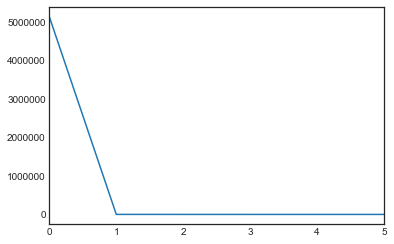

In [33]:
from sklearn.decomposition import PCA


Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.xlim((0, 5))
plt.show()


In [35]:
pca = PCA(n_components=1)
#pca.fit(X)
X_pca = pca.fit_transform(X)

In [37]:
y_pred = clf.fit(X_pca, y_1d).predict(X_pca)

confusion_matrix(y, y_pred)

array([[5040,  123],
       [1573,  296]], dtype=int64)

In [38]:
cross_val_score(clf, X_pca, y_1d, cv=10, scoring='accuracy')

array([0.75142045, 0.75      , 0.75142045, 0.74110953, 0.74537696,
       0.75675676, 0.75960171, 0.74822191, 0.74964438, 0.76780627])